# Arlington 2050 Wrap Up

## Summary

- I participated in the Arlington 2050 project, which is a project created by Arlington County in Virginia, to obtain information from residents about Arlington's future. The county set up different polling stands where residents were given a post card and asked to answer a couple questions. 
- The questions were, "Share your message from the future here!", "Getting here wasn't easy, but it was worth it! Here is how we did it:"
- The part I played in this whole project was analyising all the data, and creating visuals with it.
- I specifically worked on the data collected from the county fair.

Lets begin writing the code. First lets import pandas.

In [13]:
import pandas as pd

Now lets load the excel file with all our data into pandas, and lets view the columns.

In [14]:
array1 = pd.read_excel("../../CountyFair.xlsx")
array1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Physical Postcards  97 non-null     object
 1   Unnamed: 1          96 non-null     object
 2   Unnamed: 2          7 non-null      object
 3   Unnamed: 3          58 non-null     object
 4   Unnamed: 4          2 non-null      object
dtypes: object(5)
memory usage: 3.9+ KB


As we can see there are some unnamed columns with data, so lets change their names to accurately match the data they store.

In [15]:
ds = array1.rename(columns={ "Unnamed: 1": "Year2050", "Unnamed: 2": "Translation1", "Unnamed: 3": "Getting_Here","Unnamed: 4": "Translation2"})
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Physical Postcards  97 non-null     object
 1   Year2050            96 non-null     object
 2   Translation1        7 non-null      object
 3   Getting_Here        58 non-null     object
 4   Translation2        2 non-null      object
dtypes: object(5)
memory usage: 3.9+ KB


Now that the columns all have names, we can begin our analysis. Lets import some libraries that can help us analyze the data.

In [17]:
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

When looking through the data, some of the resposes were in spanish. To avoid errors, lets replace them with their translated version.

In [18]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

string_list = ds['Year2050'].tolist()
spanish_list = ds['Translation1'].tolist()
IndexCounter = 0
for n in spanish_list: # Gets non null values from the spanish translated list, if they're not null then it appends to the corresponding index of the main list.
    workingstring = str(n)
    if workingstring != 'nan':
        string_list[IndexCounter] = workingstring
    IndexCounter += 1

Now we can seperate all of the words used in our data, this will allow us to find the most common words.

In [19]:
text = ds['Year2050'].str.cat(sep='')

doc = nlp(text)

words = [token.text for token in doc if not token.is_stop and not token.is_punct]

Once we have our most common word list, we can create a wordcloud to visualize what words were the most common.

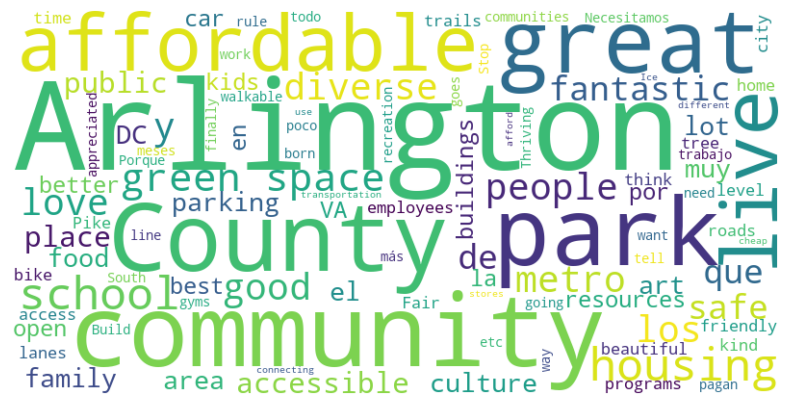

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, mask=None, contour_width=3, contour_color='steelblue').generate(" ".join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Some observations we can make from these word clouds are the main topics or issues that the residents brought up. These are "housing", "affordability", "parks", "school", and "community". These five words are the core values and issues of a majority of Arlington residents.